# The Heisenberg Model

Goal: To simulate the two qubit open chain isotropic Heisenberg model and plot the magnetisation.

Hamiltonian:
$$
H = J\big(\sigma_x\otimes\sigma_x+\sigma_y\otimes\sigma_y+\sigma_z\otimes\sigma_z\big)
$$
The time evolution operator: 
$$
U = e^{-iJt\sigma_x\otimes\sigma_x} e^{-iJt\sigma_y\otimes\sigma_y} e^{-iJt\sigma_z\otimes\sigma_z}
$$

In [1]:
#some necessary imports libraries

import numpy as np
from numpy import pi
import qiskit
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout, array_to_latex
from qiskit.providers.aer import noise
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

In [8]:
# Creating circuit
def ev_circ(qc,J,t):
    
    #qc.h(qr[0])
    #qc.barrier()
    psi = J*t
    
    for i in range(1):
        #sigma_x sigma_x term
        qc.ry(pi/2, qr[i])
        qc.ry(pi/2, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.rz(2*psi, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.ry(-pi/2, qr[i+1])
        qc.ry(-pi/2, qr[i])
        qc.barrier()
        
        #sigma_y sigma_y term
        qc.rx(pi/2, qr[i])
        qc.rx(pi/2, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.rz(2*psi, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.rx(-pi/2, qr[i+1])
        qc.rx(-pi/2, qr[i])
        qc.barrier()
        
        #sigma_z sigma_z term
        qc.cx(qr[i],qr[i+1])
        qc.rz(2*psi, qr[i+1])
        qc.cx(qr[i],qr[i+1])

    return qc


#Simulating circuit
def sim(i):
    [circ2[j].measure(qr[i],cr[0]) for j in range(len(circ2))]
    result_sim = execute(circ2, backend, shots=1024).result()
    a = result_sim.get_counts()
    p0 = []
    p1 = []
    for k in range(len(a)):
        if '0' in a[k]:
            p0.append(a[k]['0'])
        else:
            p0.append(0)
        if '1' in a[k]:
            p1.append(a[k]['1'])
        else:
            p1.append(0)
    p = (np.array(p0)-np.array(p1))/(2*1024)
    return p

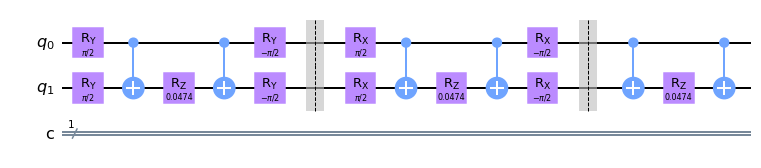

In [9]:
qc = QuantumCircuit(qr,cr)
t = 1
circ = ev_circ(qc,J,t)
circ.draw('mpl')

In [4]:
J = 0.01183898*2
total_t = 100
del_t = 1
num_steps = int(total_t/del_t)

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(1, 'c')

circ2 = []
d = []

for step in range(0, num_steps+1):
    qc = QuantumCircuit(qr,cr)
    t = (step)*del_t
    d.append(J*t)
    circ2.append(ev_circ(qc,J,t))

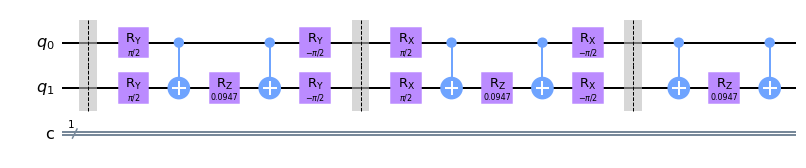

In [5]:
circ2[2].draw('mpl')

In [115]:
prob = {}
for i in range(2):
    p = sim(i)
    prob['q'+str(i)] = p

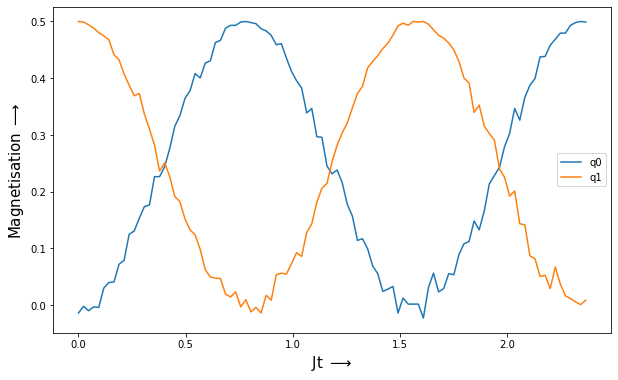

In [116]:
fig = plt.figure(figsize=[10,6])
plt.plot(d,prob['q0'])
plt.plot(d,prob['q1'])
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Magnetisation $\longrightarrow$',fontsize=15)
plt.legend(['q0','q1'])
plt.show()

Reference: <a href='https://onlinelibrary.wiley.com/doi/abs/10.1002/qute.201900052?casa_token=ReqqCHdF4LQAAAAA:vUJdTFIt62NK3ziJQsCcRbVbwAvY_tfRUz5L0lQN100jRw3aIH5H4aU92wwwfQZxOTw7v6RuOcXuYAY'>Tacchino, Francesco, et al. "Quantum computers as universal quantum Simulators: state‐of‐the‐art and perspectives." Advanced Quantum Technologies 3.3 (2020): 1900052.</a>

In [120]:
# Creating circuit
def ev_circ3(qr,n,J,t):
    qc = QuantumCircuit(3)
    
    delB = 20*J*t
    qc.x(2)
    qc.barrier()
    qc.rz(2*delB, [0,1,2])
    
    for j in range(n):
        
        psi = J*t
        
        for i in range(2):
            qc.barrier()
            # Sigma_x sigma_x term
            qc.ry(pi/2, i)
            qc.ry(pi/2, i+1)
            qc.cx(i,i+1)
            qc.rz(2*psi, i+1)
            qc.cx(i,i+1)
            qc.ry(-pi/2, i+1)
            qc.ry(-pi/2, i)
            qc.barrier()
        
            # Sigma_y sigma_y term
            qc.rx(pi/2, i)
            qc.rx(pi/2, i+1)
            qc.cx(i,i+1)
            qc.rz(2*psi, i+1)
            qc.cx(i,i+1)
            qc.rx(-pi/2, i+1)
            qc.rx(-pi/2, i)
            qc.barrier()
            
            # Sigma_z sigma_z term
            qc.cx(i,i+1)
            qc.rz(2*psi, i+1)
            qc.cx(i,i+1)
        qc.barrier()
    
    qc.measure_all()
    
    return qc

In [170]:
n = 5
J = 0.01183898*2
total_t = 100
del_t = 1
num_steps = int(total_t/del_t)

circ3 = []
e = []
qr = QuantumRegister(2, 'qr')

for step in range(0, num_steps+1):
    t = step*del_t
    e.append(J*t)
    circ3.append(ev_circ3(qr,n,J,t))

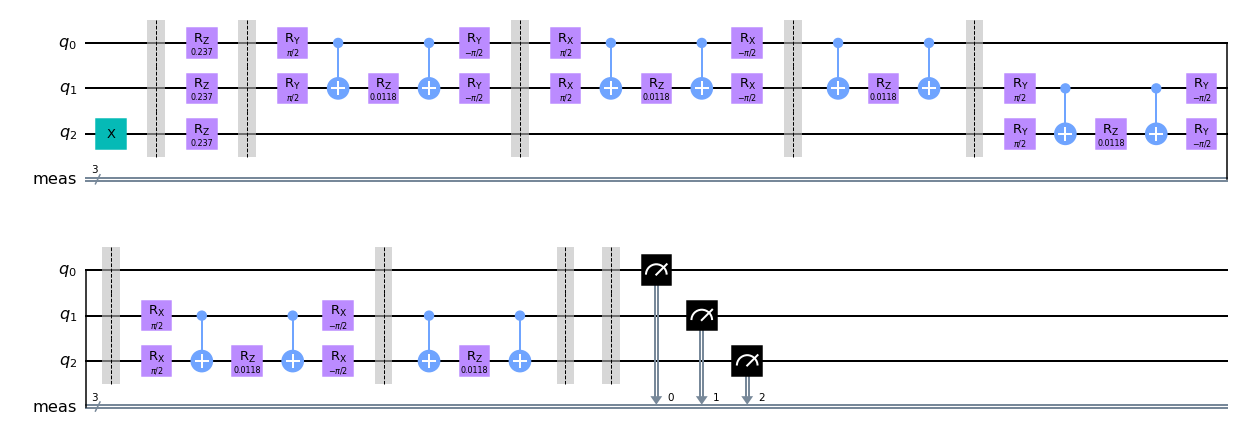

In [122]:
#Circuit for single trotter step (n=1)
circ3[0].draw('mpl')

In [171]:
Result = execute(circ3, backend, shots=1024).result()
Counts = Result.get_counts()
prob3 = []
for i in range(len(Counts)):
    if '100' in Counts[i]:
        p = Counts[i]['100']
    else:
        p = 0
    prob3.append(p/(1024))

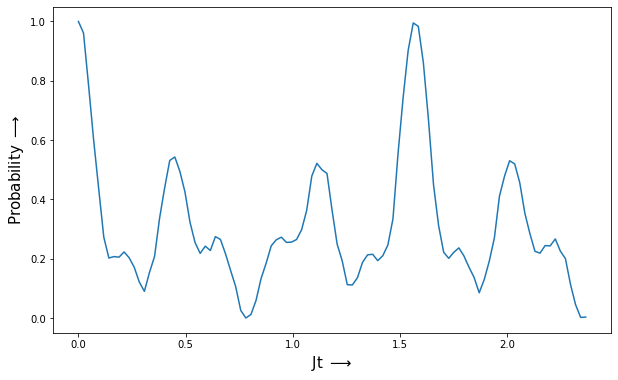

In [172]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,prob3)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Probability $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()

In [129]:
# Creating circuit for extracting correlation functions

def ev_circ4(n,J,t,x,meas):
    """
    qr: Quantum register of three 
    n: Number of trotter steps
    J: J value (Intraction strength)
    t: Time step
    meas: Measurement type, one of 'Re' or 'Im' for real or imaginary part respectivily.
    
    """
    
    a = QuantumRegister(1,'a')
    q = QuantumRegister(3,'q')
    c = ClassicalRegister(1,'c')
    qc = QuantumCircuit(a,q,c)
    
    delB = 20*J*t
    psi = J*t/n
    
    qc.x(q)
    qc.h(a)
    qc.cx(a[0],q[0])
    qc.barrier()
    qc.rz(2*delB, q)
    #qc.barrier()
    
    # For two qubit interacction terms
    for j in range(n):
        for i in range(2):
            qc.barrier()
            qc.ry(pi/2, q[i])
            qc.ry(pi/2, q[i+1])
            qc.cx(q[i],q[i+1])
            qc.rz(2*psi, q[i+1])
            qc.cx(q[i],q[i+1])
            qc.ry(-pi/2, q[i+1])
            qc.ry(-pi/2, q[i])
            qc.barrier()
        
            qc.rx(pi/2, q[i])
            qc.rx(pi/2, q[i+1])
            qc.cx(q[i],q[i+1])
            qc.rz(2*psi, q[i+1])
            qc.cx(q[i],q[i+1])
            qc.rx(-pi/2, q[i+1])
            qc.rx(-pi/2, q[i])
            qc.barrier()
            
            qc.cx(q[i],q[i+1])
            qc.rz(2*psi, q[i+1])
            qc.cx(q[i],q[i+1])
        qc.barrier()
    
    qc.x(a)
    qc.cx(a[0],q[x-1])
    qc.x(a)
    
    qc.barrier()
    
    #for measurement (real or imaginary)
    if (meas == 'Re'):
        qc.h(a)
        qc.measure(a,c)
    elif (meas == 'Im'):
        #qc.sdg(a)
        #qc.h(a)
        qc.rx(pi/2, a)
        qc.measure(a,c)
    
    return qc


# Function for simulation and extracting the expectation value
def sim4():
    result_sim = execute(circ4, backend, shots=1024).result()
    a = result_sim.get_counts()
    p0 = []
    p1 = []
    for k in range(len(a)):
        if '0' in a[k]:
            p0.append(a[k]['0'])
        else:
            p0.append(0)
        if '1' in a[k]:
            p1.append(a[k]['1'])
        else:
            p1.append(0)
    p = (np.array(p0)-np.array(p1))/(4*1024)
    return p

In [168]:
n = 5
J = 2*0.01183898
total_t = 100
del_t = 1
num_steps = int(total_t/del_t)

### Circuit Visulaisation

#### For Re[$c^{11}_{xx}$] (with single trotter step):

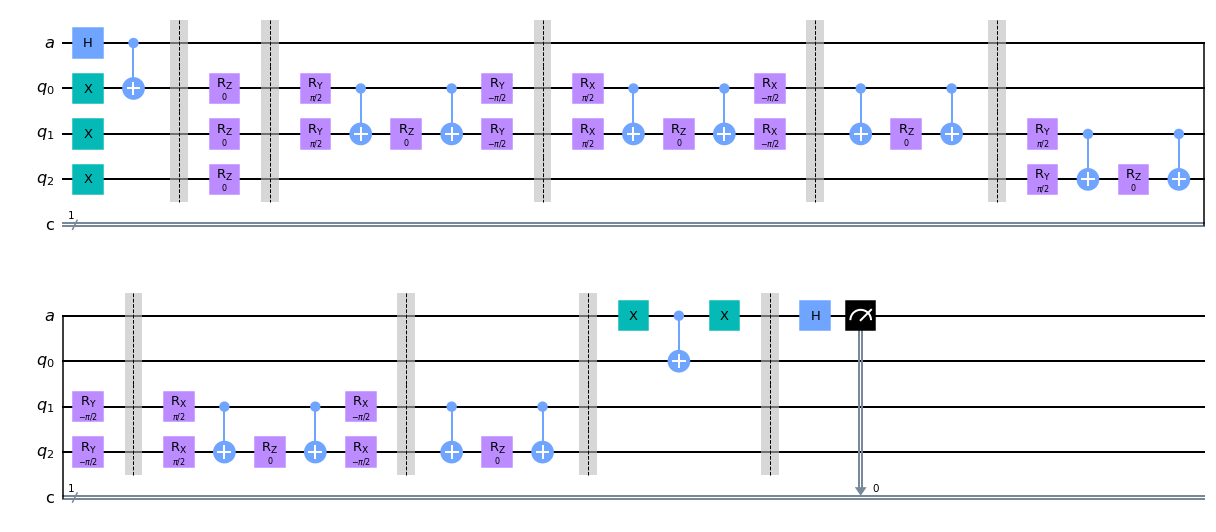

In [165]:
circ4[0].draw('mpl')

#### For Im[$c^{31}_{xx}$] (with single trotter step):

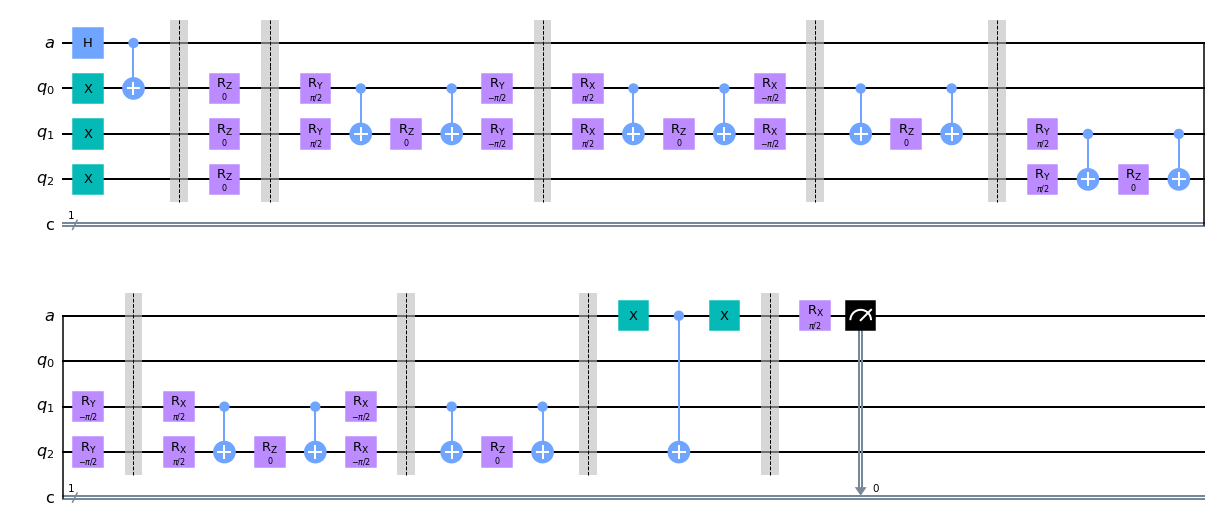

In [167]:
circ4[0].draw('mpl')

### I)   $ \langle S^{(1)}(t)S^{(1)}\rangle$

In [164]:
circ4 = []
e = []

for step in range(0, num_steps+1):
    t = step*del_t
    e.append(J*t)
    circ4.append(ev_circ4(n,J,t,x=1,meas='Re'))

p_s11 = sim4()

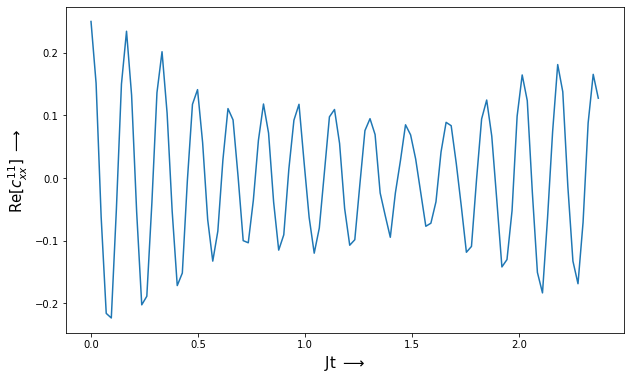

In [143]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,p_s11)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(r'Re[$c^{11}_{xx}$] $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()

In [146]:
circ4 = []
for step in range(0, num_steps+1):
    t = step*del_t
    circ4.append(ev_circ4(n,J,t,x=1,meas='Im'))
    
p_s11_im = sim4()

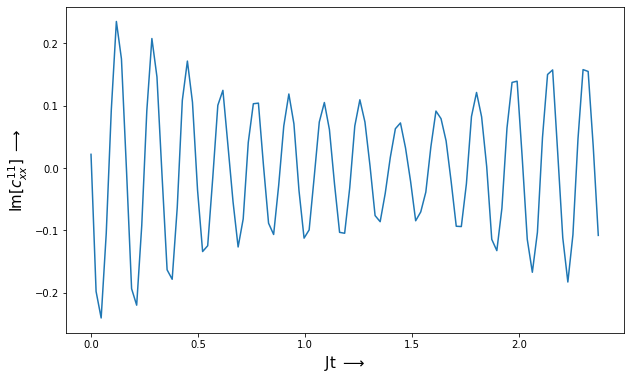

In [156]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,p_s11_im)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(r'Im[$c^{11}_{xx}$] $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()

### II) $ \langle S^{(2)}(t)S^{(1)}\rangle$

In [148]:
circ4 = []
for step in range(0, num_steps+1):
    t = step*del_t
    circ4.append(ev_circ4(n,J,t,x=2,meas='Re'))
    
p_s12_re = sim4()

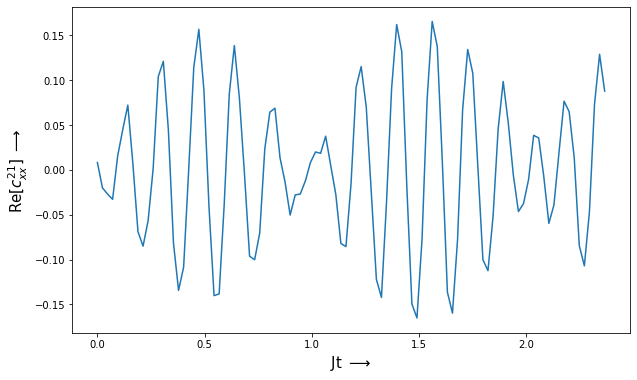

In [160]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,p_s12_re)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(r'Re[$c^{21}_{xx}$] $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()

In [150]:
circ4 = []
for step in range(0, num_steps+1):
    t = step*del_t
    circ4.append(ev_circ4(n,J,t,x=2,meas='Im'))
    
p_s12_im = sim4()

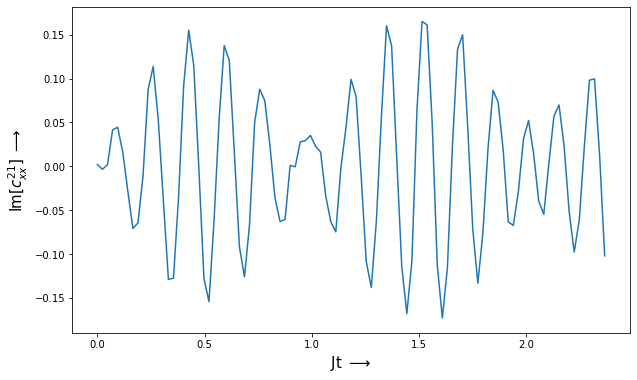

In [159]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,p_s12_im)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(r'Im[$c^{21}_{xx}$] $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()

### III) $ \langle S^{(3)}(t)S^{(1)}\rangle$

In [152]:
circ4 = []
for step in range(0, num_steps+1):
    t = step*del_t
    circ4.append(ev_circ4(n,J,t,x=3,meas='Re'))
    
p_s13_re = sim4()

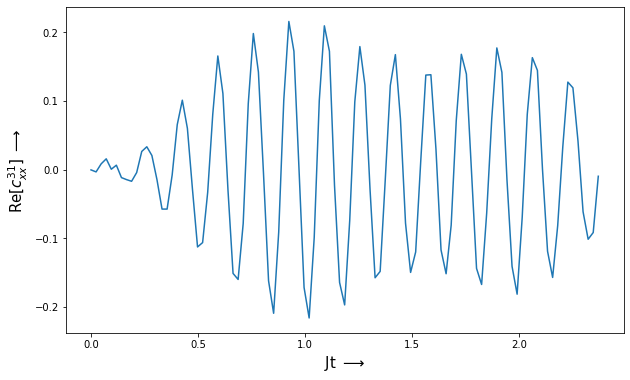

In [161]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,p_s13_re)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(r'Re[$c^{31}_{xx}$] $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()

In [169]:
circ4 = []
for step in range(0, num_steps+1):
    t = step*del_t
    circ4.append(ev_circ4(n,J,t,x=3,meas='Im'))
    
p_s13_im = sim4()

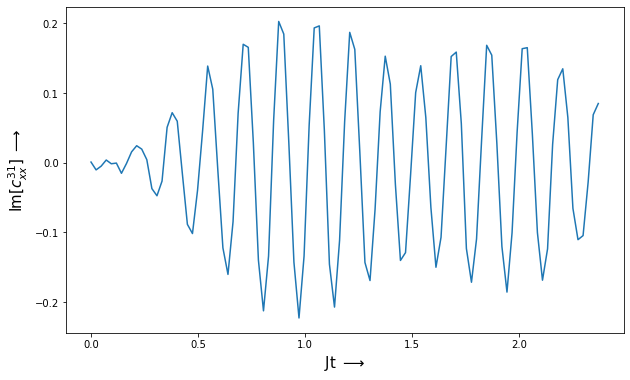

In [162]:
fig = plt.figure(figsize=[10,6])
plt.plot(e,p_s13_im)
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(r'Im[$c^{31}_{xx}$] $\longrightarrow$',fontsize=15)
#plt.legend(['q0','q1'])
plt.show()